# Main pipeline:
## 1. imports 
### a. [import python dependencies](#1.a.import-python-dependencies)
### b. [import custom dependencies](#1.b.import-custom-dependencies)
## 2. [initialize system constants](#2.initialize-system-constants)
## 3. dataset
### a. [get dataset & extract classes](#3.a.get-dataset-&-extract-classes)
### b. [initialize dataset loader](#3.b.initialize-dataset-loader)
### c. [split dataset](#3.c.split-dataset)
## 4. [instanciate model object](#4.instanciate-model-object)
## 5. [train model](#5.train-model)
## 6. [prepare ploting values](#6.prepare-ploting-values)

# 1.a.import python dependencies

In [3]:
from torch import device, cuda
from torch.utils.data import DataLoader
import torch

# 1.b.import custom dependencies

In [4]:
from main_functions import get_dataset, dataset_split, train_and_test_model, ploting_values
from models import Squeezenet

# 2.initialize system constants

In [5]:
device = device("cuda:0" if cuda.is_available() else "cpu")
data_path = "/home/clouduser/Documents/vladu/custom/base_and_augmented_dataset"
resize_tuple = (60, 80)
mean = [0.5580, 0.5417, 0.5160]
std = [0.2349, 0.2252, 0.2226]
batch_size = 32
num_workers = 16
train_split_size = 0.7
val_split_size = 0.15
num_classes = 2
dropout_prob=0.5
epoch_treshold = 11
learning_rate_variation = 0.01
learning_rate = 0.0001
num_epochs = 20
weight_decay = 0.0001

/home/clouduser/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:141: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


# 3.a.get dataset & extract classes

In [6]:
dataset = get_dataset(data_path, resize_tuple, mean, std)
classes = dataset.classes

# 3.b.initialize dataset loader

In [7]:
loader = DataLoader(dataset, batch_size=batch_size, num_workers=num_workers, shuffle=False)

/home/clouduser/.local/lib/python3.8/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# 3.c.split dataset

In [8]:
train_loader, val_loader, test_loader = dataset_split(dataset, train_split_size, val_split_size, num_workers)

# 4.instanciate model object

In [9]:
model = Squeezenet(num_classes, dropout_prob=dropout_prob)

/home/clouduser/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/clouduser/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# 5.train model

In [10]:
train_accuracy, val_accuracy, train_losses, val_losses = train_and_test_model(train_loader, val_loader, test_loader, num_epochs, model, learning_rate, num_classes, device, classes, weight_decay, epoch_treshold, learning_rate_variation)

Train [E 1, Accuracy: 58.86%]
tensor([[315, 144],
        [124, 322]])
Validation [Loss: 0.5674, Accuracy: 70.39%, Precision: 69.10%, Recall: 72.20%, F1_score: 70.61%]
Train [E 2, Accuracy: 72.95%]
tensor([[285, 174],
        [ 36, 410]])
Validation [Loss: 0.4580, Accuracy: 76.80%, Precision: 70.21%, Recall: 91.93%, F1_score: 79.61%]
Train [E 3, Accuracy: 79.93%]
tensor([[326, 133],
        [ 27, 419]])
Validation [Loss: 0.3707, Accuracy: 82.32%, Precision: 75.91%, Recall: 93.95%, F1_score: 83.97%]
Train [E 4, Accuracy: 86.91%]
tensor([[425,  34],
        [ 78, 368]])
Validation [Loss: 0.3159, Accuracy: 87.62%, Precision: 91.54%, Recall: 82.51%, F1_score: 86.79%]
Train [E 5, Accuracy: 90.41%]
tensor([[448,  11],
        [118, 328]])
Validation [Loss: 0.4167, Accuracy: 85.75%, Precision: 96.76%, Recall: 73.54%, F1_score: 83.57%]
Train [E 6, Accuracy: 93.70%]
tensor([[404,  55],
        [ 15, 431]])
Validation [Loss: 0.2067, Accuracy: 92.27%, Precision: 88.68%, Recall: 96.64%, F1_score: 

# 6. ploting values

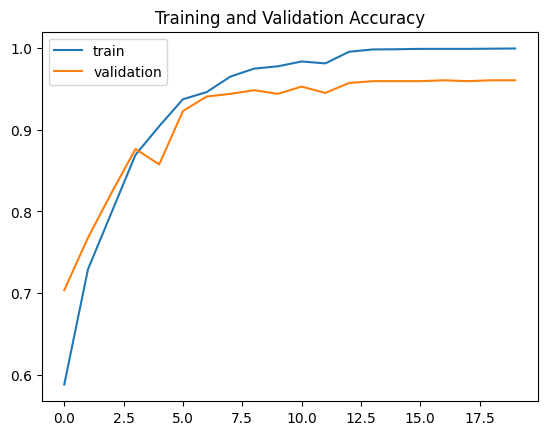

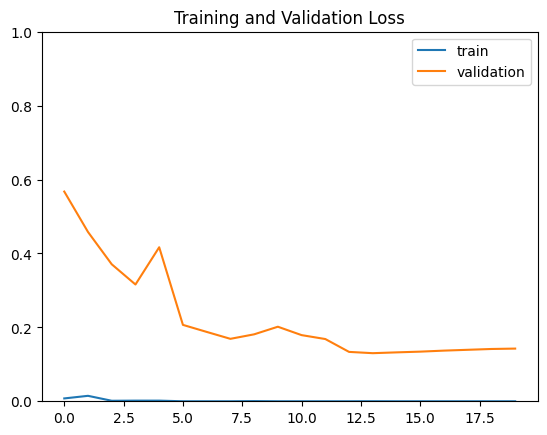

In [11]:
ploting_values(train_accuracy, val_accuracy, train_losses, val_losses)

# Saving the model

In [14]:
torch.save(model.state_dict(), 'VU_model.pth')